# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP April-22

### BEGINNER LEVEL TASK

### TASK-2 - Stock Market Prediction And Forecasting Using Stacked LSTM

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [5]:
# Importing Libraries

df = pd.read_csv('NSE-TATAGLOBAL.csv')
df=df. iloc[::-1]
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df.shape

(2035, 8)

Text(0.5, 1.0, 'High')

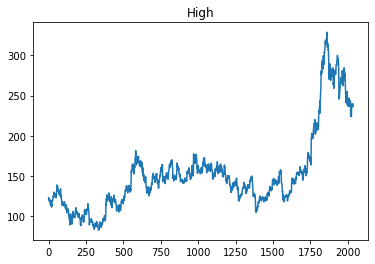

In [12]:
df_High=df.reset_index()['High']
plt.plot(df_High)
plt.title("High")

In [14]:
scaler = MinMaxScaler(feature_range = (0,1))
df_High = scaler.fit_transform(np.array(df_High).reshape(-1,1))

In [15]:
df_High.shape

(2035, 1)

In [16]:
df_High

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [18]:
# Split the data into train and test split

training_size = int(len(df_High) * 0.75)
test_size = len(df_High) - training_size
train_data, test_data = df_High[0:training_size,:], df_High[training_size:len(df_High),:1]

In [19]:
training_size,test_size

(1526, 509)

In [20]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
print(x_train.shape), print(y_train.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [24]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [26]:
# Create the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 15s 340ms/step - loss: 0.0127 - val_loss: 0.0603
Epoch 2/100
23/23 [==============================] - 6s 278ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 3/100
23/23 [==============================] - 6s 281ms/step - loss: 9.4365e-04 - val_loss: 0.0035
Epoch 4/100
23/23 [==============================] - 6s 272ms/step - loss: 7.9544e-04 - val_loss: 0.0030
Epoch 5/100
23/23 [==============================] - 6s 275ms/step - loss: 7.5339e-04 - val_loss: 0.0029
Epoch 6/100
23/23 [==============================] - 7s 287ms/step - loss: 7.1980e-04 - val_loss: 0.0028
Epoch 7/100
23/23 [==============================] - 6s 280ms/step - loss: 7.1734e-04 - val_loss: 0.0025
Epoch 8/100
23/23 [==============================] - 6s 279ms/step - loss: 6.8766e-04 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 7s 289ms/step - loss: 6.6385e-04 - val_loss: 0.0028
Epoch 10/100
23/23 [==============================] - 6s 280ms

In [29]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
# Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train, train_predict))

135.4481206871619

In [32]:
# Test Data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

226.44768852604247

In [33]:
look_back = 100
trainPredictPlot = np.empty_like(df_High)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [34]:
testPredictPlot = np.empty_like(df_High)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_High) - 1, :] = test_predict

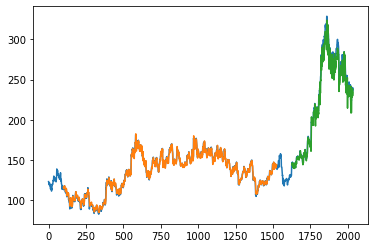

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [35]:
plt.plot(scaler.inverse_transform(df_High))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")

In [36]:
# Predict the next 28 days Stock Price

len(test_data), x_test.shape

(509, (408, 100, 1))

In [37]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.60545427]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

In [39]:
day_new = np.arange(1,101)
day_pred = np.arange(101,129)

In [40]:
day_new.shape

(100,)

In [41]:
day_pred.shape


(28,)

In [42]:
df1 = df_High.tolist()
df1.extend(lst_output)

len(df_High)

2035

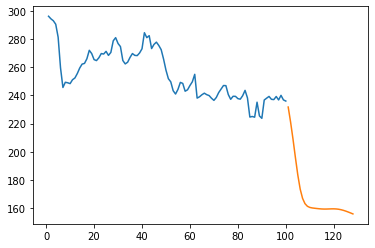

In [43]:
plt.plot(day_new, scaler.inverse_transform(df_High[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

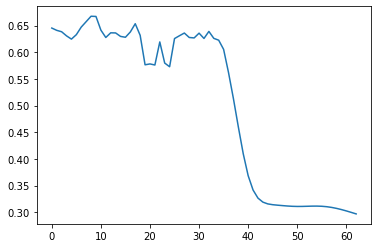

In [46]:
df1=df_High.tolist()
df1.extend(lst_output)
plt.plot(df1[2000:])

In [47]:
df1=scaler.inverse_transform(df1).tolist()

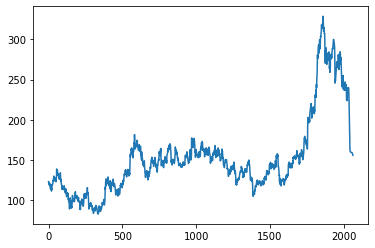

In [48]:
plt.plot(df1)